# Introduction

This goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

**Data sources:**

Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).

Note: The data for this project is *inspired* by real data, but is mostly fictional.

## Scoping

It's beneficial to create a project scope whenever a new project is being started. Four sections were created below to help guide the project's process and progress:
- The first section is the project goals, this section will define the high-level objectives and set the intentions for this project.
- The next section is the data, luckily in this project, data is already provided but still needs to be checked if project goals can be met with the available data.
- Thirdly, the analysis will have to be thought through, which include the methods and questions that are aligned with the project goals.
- Lastly, evaluation will help us build conclusions and findings from our analysis.

### Project Goals

In this project the perspective will be through a biodiversity analyst for the National Parks Service. The National Park Service wants to ensure the survival of at-risk species, to maintain the level of biodiversity within their parks. Therefore, the main objectives as an analyst will be understanding characteristics about the species and their conservations status, and those species and their relationship to the national parks. Some questions that are posed:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

### Data

This project has two data sets that came with the package:
- `species_info.csv` - contains data about different species and their conservation status
- `observations.csv` - holds recorded sightings of different species at several national parks for the past 7 days.

### Analysis

In this section, descriptive statistics and data visualization techniques will be employed to understand the data better. Statistical inference will also be used to test if the observed values are statistically significant. Some of the key metrics that will be computed include: 

1. Distributions
1. counts
1. relationship between species
1. conservation status of species
1. observations of species in parks

### Evaluation

Lastly, it's a good idea to revisit the goals and check if the output of the analysis corresponds to the questions first set to be answered (in the goals section). This section will also reflect on what has been learned through the process, and if any of the questions were unable to be answered. This could also include limitations or if any of the analysis could have been done using different methodologies.

## Import python libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

## Loading the data

To analyze the status of conservation of species and their observations in national parks, load datasets into `DataFrames` for exploration and visualisation in python.

### species
The `species_info.csv` contains information on the different species in the National Parks. The columns in the data set include:
- **category** - The category of taxonomy for each species
- **scientific_name** - The scientific name of each species
- **common_names** - The common names of each species
- **conservation_status** - The species conservation status

In [3]:
species = pd.read_csv('species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


### observations
The `Observations.csv` contains information from recorded sightings of different species throughout the national parks in the past 7 days. The columns included are:

- **scientific_name** - The scientific name of each species
- **park_name** - The name of the national park
- **observations** - The number of observations in the past 7 days

In [4]:
observations = pd.read_csv('observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


### Data characteristics
Dimensions of data sets:
- **species:** 5,824 rows and 4 columns 
- **observations:** 23,296 rows and 3 columns 

In [5]:
print(f"species shape: {species.shape}")
print(f"observations shape: {observations.shape}")

species shape: (5824, 4)
observations shape: (23296, 3)


## Explore the Data

### species dataframe
There are total 5,541 species.

In [10]:
print(f'number of species: {species.scientific_name.nunique()}')

number of species: 5541


There are 7 categories including plants and animals.

In [13]:
print(f'no. of categories: {species.category.nunique()}')
print(f'categories: {species.category.unique()}')
species.groupby("category").size()

no. of categories: 7
categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

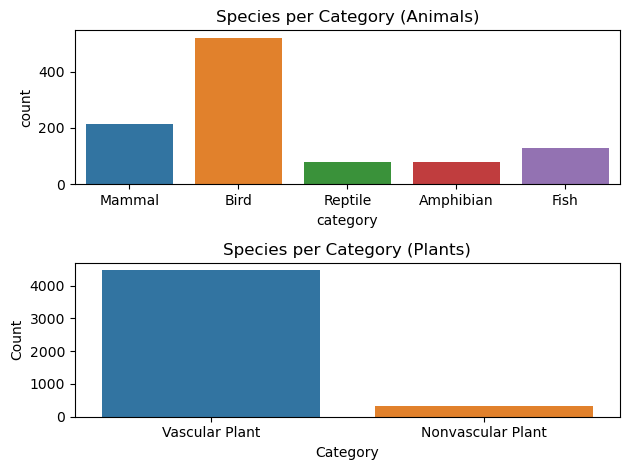

In [86]:
plants = species['category'].str.contains('Plant', regex=True)
subset_animals = species[~plants]
subset_plants = species[plants]

plt.figure()
plt.subplot(2,1,1)
sns.countplot(data=subset_animals, x='category')
plt.title("Species per Category (Animals)")
plt.subplot(2,1,2)
sns.countplot(data=subset_plants, x='category')
plt.title("Species per Category (Plants)")
plt.xlabel("Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

`conservation_status` column has 4 categories:
- Species of Concern - 161
- Endangered - 16
- Threatened - 10
- In Recovery - 4

This column also has 5,633 `NaN` values which means they are species without any concerns (structurally missing data).

In [ ]:
print(f"unique conservation statuses:{species.conservation_status.unique()}")
print(f"number of conservation statuses:{species.conservation_status.nunique()}")

print(f'na values: {species.conservation_status.isna().sum()}')
print(species.groupby("conservation_status").size())

unique conservation statuses:[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']
number of conservation statuses:4
na values: 5633
conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


### observations dataframe

There are 4 national parks. 

In [15]:
print(f'number of parks: {observations.park_name.nunique()}')
print(f'parks: {observations.park_name.unique()}')

number of parks: 4
parks: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


There are a total of 3,314,739 sightings in the last 7 days and park wise observation is also mentioned below.

In [58]:
print(f'number of observations: {observations.observations.sum()}')
df = observations.groupby("park_name").observations.sum()
df

number of observations: 3314739


park_name
Bryce National Park                     576025
Great Smoky Mountains National Park     431820
Yellowstone National Park              1443562
Yosemite National Park                  863332
Name: observations, dtype: int64

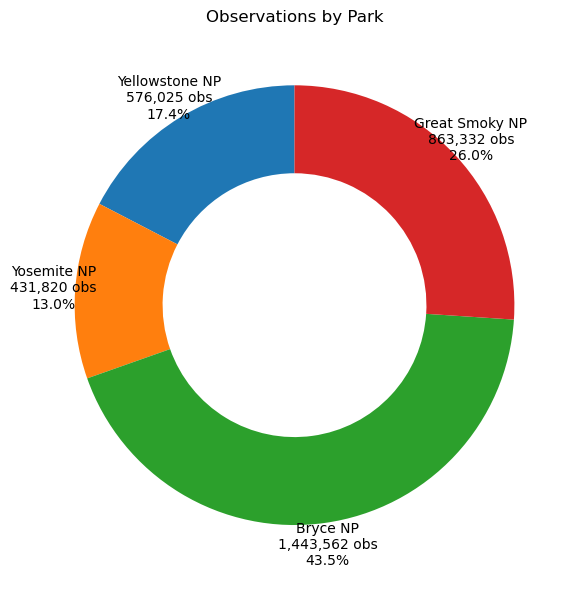

In [ ]:
park_names_short = [
    "Yellowstone NP",
    "Yosemite NP", 
    "Bryce NP",
    "Great Smoky NP"
]
sizes = df 
labels = park_names_short

fig, ax = plt.subplots(figsize=(6,6))
wedges, texts = ax.pie(
    sizes,
    wedgeprops=dict(width=0.4),   
    startangle=90,
    labels=None                  
)

total = sum(sizes)
for w, label, size in zip(wedges, labels, sizes):
    ang = (w.theta2 + w.theta1) / 2
    x, y = np.cos(np.deg2rad(ang)), np.sin(np.deg2rad(ang))

    percentage = size / total * 100
    text = f"{label}\n{size:,} obs\n{percentage:.1f}%"

    ax.text(
        1.1 * x, 1.1 * y, text,
        ha='center', va='center'
    )

ax.set_aspect('equal')
plt.title("Observations by Park")
plt.tight_layout()
plt.show()


## Analysis

Afteer the basic understanding of the datasets, we are good to go to the analysis part.

First of all, we will clean the `conservation_status` column in `species`.

The column `conservation_status` has several possible values:
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range

In the exploration, a lot of `nan` values were detected. These values will need to be converted to `No Intervention required`.

In [15]:
species.fillna('No Intervention Required', inplace=True)
species.groupby("conservation_status").size()

conservation_status
Endangered                    16
In Recovery                    4
No Intervention Required    5633
Species of Concern           161
Threatened                    10
dtype: int64

Next is to checkout the different categories that are nested in the `conservation_status` column except for the ones that do not require an intervention.

For those in the `Endangered` status, 7 were mammals and 4 were birds. In the `In Recovery` status, there were 3 birds and 1 mammal, which could possibly mean that the birds are bouncing back more than the mammals.

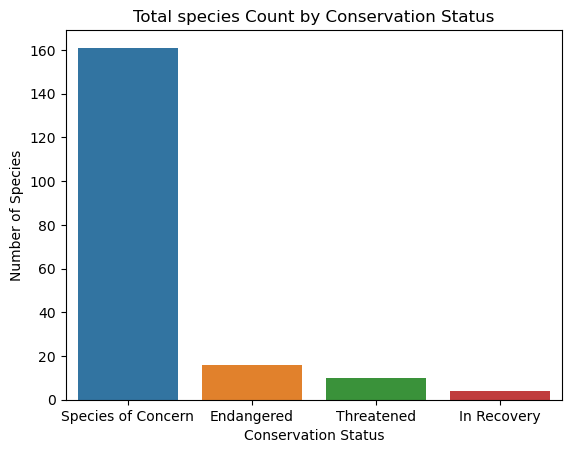

In [91]:
sns.countplot(data=species[species.conservation_status != 'No Intervention Required'], x="conservation_status")
plt.xlabel("Conservation Status")
plt.ylabel("Number of Species")
plt.title("Total species Count by Conservation Status")
plt.show()

In [16]:
conservationCategory = species[species.conservation_status != "No Intervention Required"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


Text(0.5, 1.0, 'Count by Conservation Status - species wise')

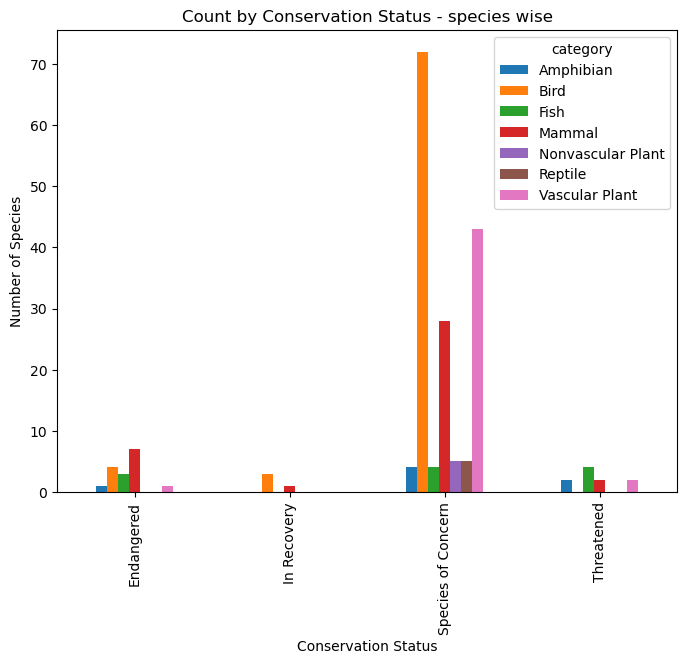

In [92]:
ax = conservationCategory.plot(kind = 'bar', figsize=(8,6))
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species")
plt.title("Count by Conservation Status - species wise")

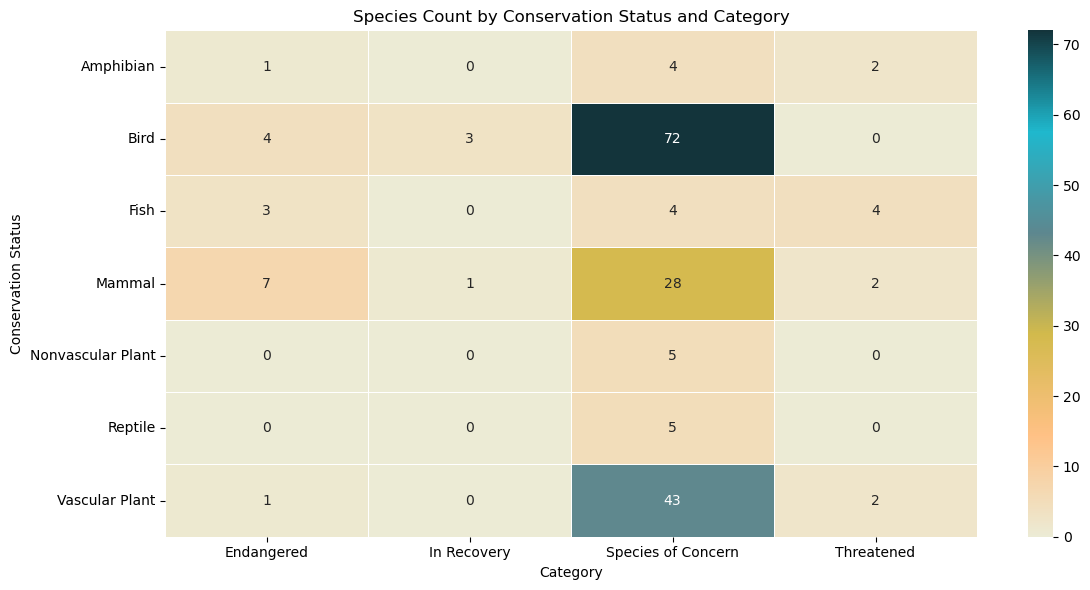

In [23]:
colorscale = [
    [0, '#ECEBD5'],      # Light green for low values
    [0.2, '#FFC185'],    # Light orange  
    [0.4, '#D2BA4C'],    # Moderate yellow
    [0.6, '#5D878F'],    # Cyan
    [0.8, '#1FB8CD'],    # Strong cyan
    [1.0, '#13343B']     # Dark cyan for high values
]
conservationCategory=conservationCategory.fillna(0)
tc = conservationCategory.T
cmap = LinearSegmentedColormap.from_list('custom_cmap', colorscale)
plt.figure(figsize=(12,6))
sns.heatmap(tc, cmap=cmap, annot=tc.values,linewidths=0.5  )
plt.title('Species Count by Conservation Status and Category')
plt.ylabel('Conservation Status')
plt.xlabel('Category')
plt.tight_layout()
plt.show()


### In conservation

The next question is if certain types of species are more likely to be endangered? This can be answered by creating anew column called `is_protected` and include any species that has a value other than `No Intervention Required`.

In [26]:
species['is_protected'] = species.conservation_status != 'No Intervention Required'

In [27]:
category_counts = species.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


It's easy to see that Birds, Mammals and Vascular plants have higher absolute number of species protected. But absolute numbers can be decieving so let's calculate the proportions.
From this analysis, one can see that ~17% of mammals and ~15% of birds are under protection.

In [31]:
category_counts['percent_protected'] = category_counts.protected / (category_counts.protected + category_counts.not_protected) * 100
category_counts = category_counts.sort_values('percent_protected')

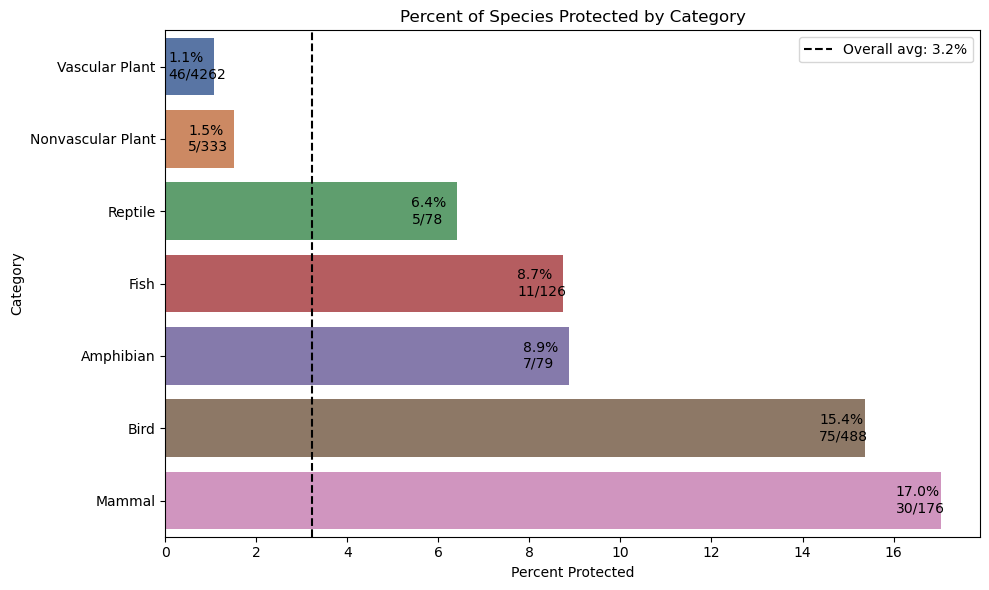

In [45]:
category_counts['total'] = (category_counts.protected + category_counts.not_protected)
overall_avg = category_counts.protected.sum()*100/(category_counts.total.sum())
category_counts['label'] = category_counts.apply(
    lambda row: f"{row['percent_protected']:.1f}%\n{row['protected']}/{row['total']}",
    axis=1
)

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='percent_protected',
    y='category',
    data=category_counts,
    orient='h',       
    palette='deep'    
)

for bar, label in zip(ax.patches, category_counts['label']):
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
   
    ax.text(
        width - 1,       
        y_pos,           
        label,
        va='center',     
        ha='left'        
    )

overall_avg = category_counts.protected.sum() * 100 / category_counts.total.sum()
ax.axvline(overall_avg, color='k', linestyle='--', label=f'Overall avg: {overall_avg:.1f}%')
ax.legend()

ax.set_xlabel('Percent Protected')
ax.set_ylabel('Category')
plt.title('Percent of Species Protected by Category')
plt.tight_layout()
plt.show()

#### Statistical Significance

This section will run some chi-squared tests to see if different species have statistically significant differences in conservation status rates. In order to run a chi squared test, a contingency table will need to be created. The contingency table should look like this:

||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Bird|?|?|

The first test will be called `contingency1` and will need to be filled with the correct numbers for mammals and birds.

The results from the chi-squared test returns many values, the second value which is 0.69 is the p-value. The standard p-value to test statistical significance is 0.05. For the value retrieved from this test, the value of 0.69 is much larger than 0.05. In the case of mammals and birds there doesn't seem to be any significant relationship between them i.e. the variables independent. 

In [45]:
from scipy.stats import chi2_contingency

contingency1 = [[30, 146],
              [75, 413]]
chi2_contingency(contingency1)

Chi2ContingencyResult(statistic=0.1617014831654557, pvalue=0.6875948096661336, dof=1, expected_freq=array([[ 27.8313253, 148.1686747],
       [ 77.1686747, 410.8313253]]))

The next pair, is going to test the difference between `Reptile` and `Mammal`.

The format is again is like below:

||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Reptile|?|?|

This time the p-value is 0.039 which is below the standard threshold of 0.05 which can be take that the difference between reptile and mammal is statistically significant. Mammals are shown to have a statistically significant higher rate of needed protection compared with Reptiles. 

In [46]:
contingency2 = [[30, 146],
               [5, 73]]
chi2_contingency(contingency2)

Chi2ContingencyResult(statistic=4.289183096203645, pvalue=0.03835559022969898, dof=1, expected_freq=array([[ 24.2519685, 151.7480315],
       [ 10.7480315,  67.2519685]]))

### Species in Parks

The next set of analysis will come from data from the conservationists as they have been recording sightings of different species at several national parks for the past 7 days.

The first step is to look at the the common names from `species` to get an idea of the most prevalent animals in the dataset. The data will be need to be split up into individual names. 

In [69]:
from itertools import chain
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_Names = species[species.category == "Mammal"]\
    .common_names\
    .apply(remove_punctuations)\
    .str.split().tolist()

common_Names[:5]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk']]

The next step is to clean up duplicate words in each row since they should no be counted more than once per species.

In [70]:
cleanRows = []

for item in common_Names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)
    
cleanRows[:5]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk']]

Next the words need to be collapsed into one list for easier use.

In [71]:
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))

Now we count the number of occurences of each word to determine most prevailing animal. 
From the analysis it seems that `Bat` occurred 23 times while `Shrew` came up 18 times. 

In [72]:
words_counted = []

for i in res:
    x = res.count(i)
    words_counted.append((i,x))

print(len(words_counted))
pd.DataFrame(set(words_counted), columns =['Word', 'Count']).sort_values("Count", ascending = False).head(10)

547


,Word,Count
182,Bat,23
100,Shrew,18
154,Myotis,17
60,Mouse,16
195,Chipmunk,13
183,American,12
198,Squirrel,12
175,Vole,11
158,Eastern,11
113,Western,10


In the data, there are several different scientific names for different types of bats.  The next task is to figure out which rows of `species` are referring to bats. A new column made up of boolean values will be created to check if `is_bat` is `True`.

In [73]:
species['is_bat'] = species.common_names.str.contains(r"\bBat\b", regex = True)
species[species.is_bat].head()

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention Required,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention Required,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention Required,False,True


Next the results of the bat species will be merged with `observations` to create a `DataFrame` with observations of bats across the four national parks.  

In [74]:
bat_observations = observations.merge(species[species.is_bat])
bat_observations.head()

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervention Required,False,True


Let's see how many total bat observations(across all species) were made at each national park.  

The total number of bats observed in each park over the past 7 days are in the table below. Yellowstone National Park seems to have the largest with 8,362 observations and the Great Smoky Mountains National Park having the lowest with 2,411. 

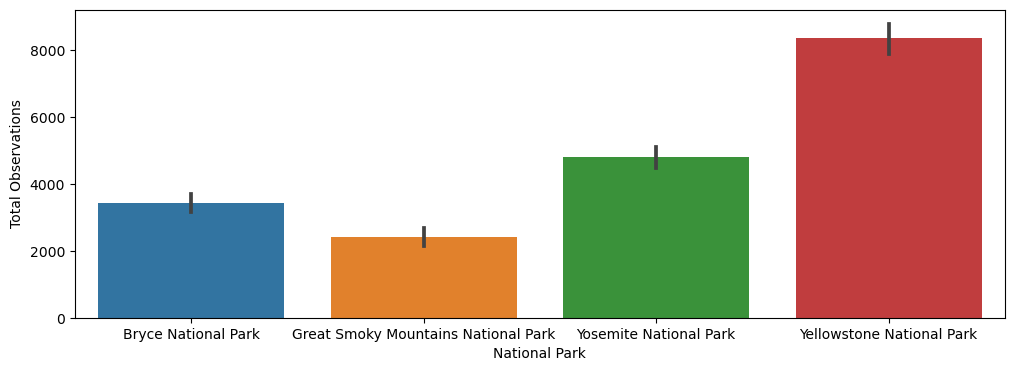

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


In [77]:
plt.figure(figsize=(12,4))
sns.barplot(
    data=bat_observations,
    x="park_name",
    y="observations",
    estimator=sum
)
plt.xlabel("National Park")
plt.ylabel("Total Observations")
plt.show()

bat_observations.groupby('park_name').observations.sum().reset_index()

Now let's see each park broken down by protected bats vs. non-protected bat sightings.

It seems that every park except for the Great Smoky Mountains National Park has more sightings of protected bats than not. This could be considered a great sign for bats.

In [76]:
obs_by_park = bat_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
obs_by_park

,park_name,is_protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


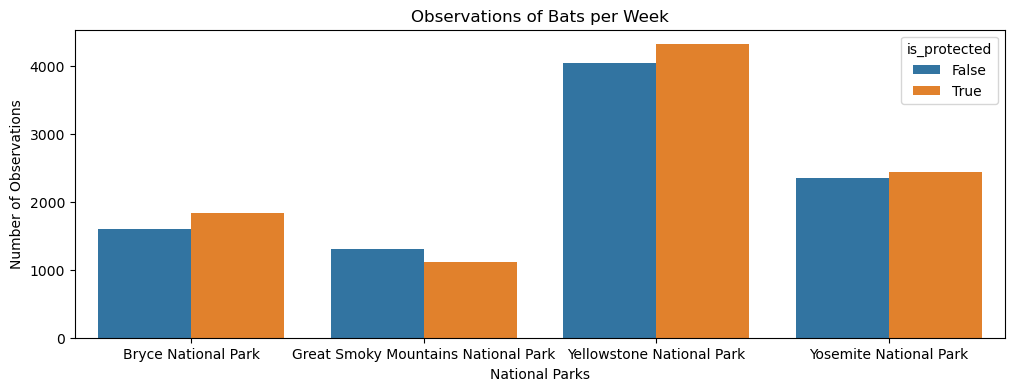

In [79]:
plt.figure(figsize = (12,4))
sns.barplot(x=obs_by_park.park_name, y= obs_by_park.observations, hue=obs_by_park.is_protected)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Bats per Week')
plt.show()

## Conclusions

The project was able to make several data visualizations and inferences about the various species in four of the National Parks that comprised this data set.

This project was also able to answer some of the questions first posed in the beginning:

- What is the distribution of conservation status for species?
    - The vast majority of species were not part of conservation.(5,633 vs 191)
- Are certain types of species more likely to be endangered?
    - Mammals and Birds had the highest percentage of being in protection.
- Are the differences between species and their conservation status significant?
    - While mammals and Birds did not have significant difference in conservation percentage, mammals and reptiles exhibited a statistically significant difference.
- Which animal is most prevalent and what is their distribution amongst parks?
    - the study found that bats occurred the most number of times and they were most likely to be found in Yellowstone National Park.
